In [48]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint



In [49]:
filepath = './model_stats.json'

with open(filepath, 'r') as file:
    model_stats = json.load(file)

In [50]:

def plot_lossv_from_model_logs(from_epoch=0):



    model_validations = {}

    for model in model_stats.keys():
        model_validations[model] = model_stats[model]['loss_vector']

    plt.figure(figsize=(12, 10))

    pprint(len(model_stats.keys()))
    for model in model_validations.keys():
        lossv = model_validations[model][from_epoch:]
        plt.plot(np.arange(1, len(lossv) + 1), lossv, label=model)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('loss vs epoch')


21


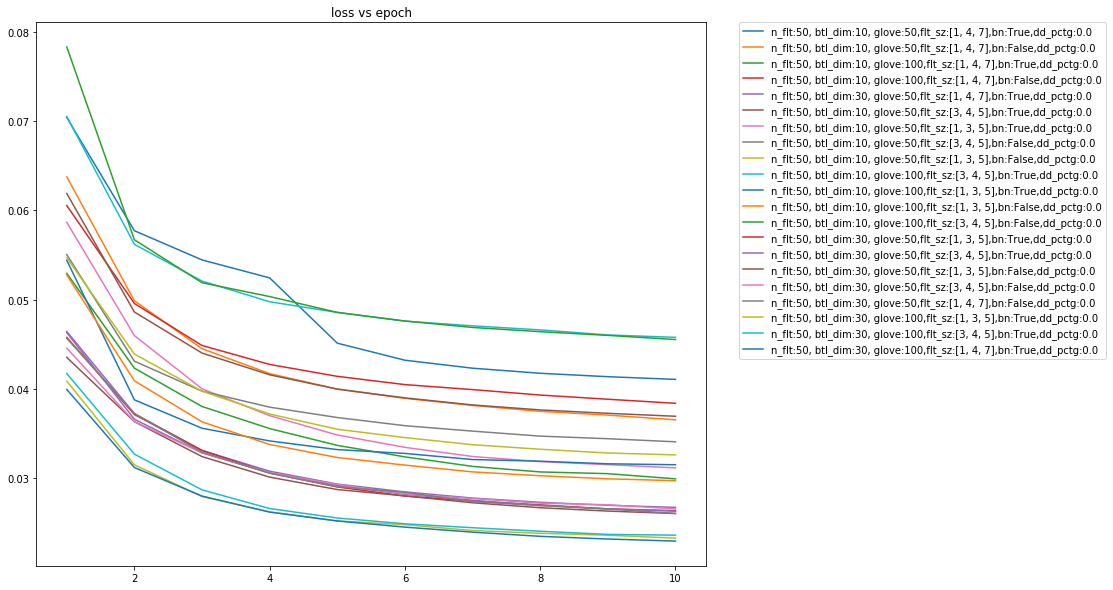

In [51]:
plot_lossv_from_model_logs()

21


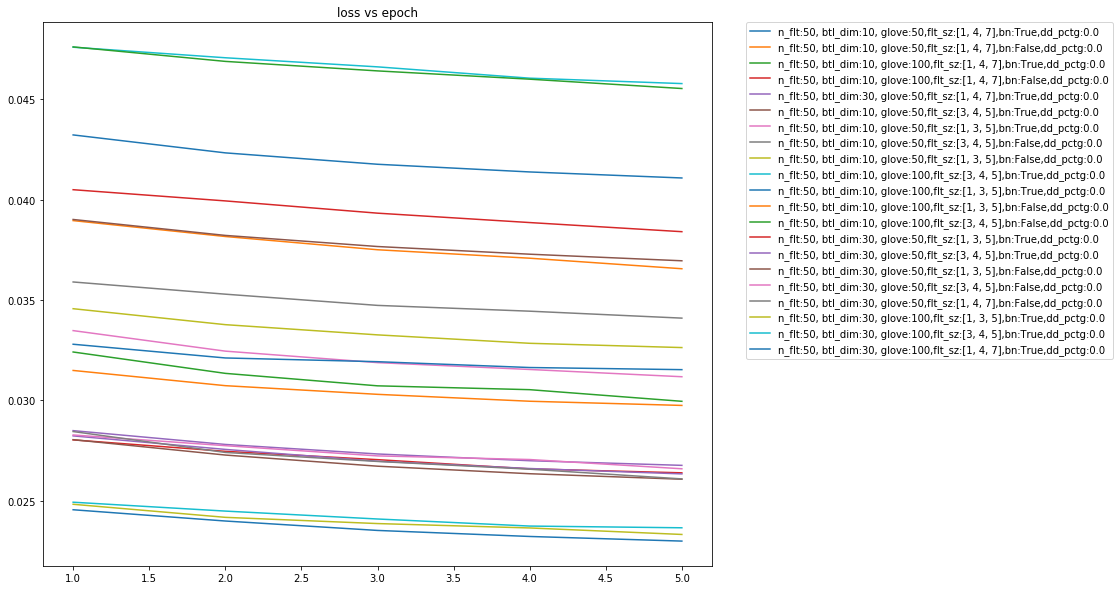

In [52]:
plot_lossv_from_model_logs(from_epoch =5 )

In [53]:
for model in model_stats.keys():
    print(model_stats[model]['f1_scores']['f1_score_3'])

0.6829688214564335
0.7084281602238184
0.752578484383827
0.6963441207327898
0.7671912409544562
0.7074597153848223
0.7443682242487828
0.7215990100341645
0.7344793263928119
0.6442417883948028
0.7412799612622065
0.749995964813171
0.6471901649046351
0.7686223872165281
0.7693756220913028
0.7680197993167084
0.766502569068948
0.7682888117719849
0.7851397519705161
0.7845048825760632
0.7869259946735534
